<h1><b>1.Data Cleaning and Preprocessing:</b></h1>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [37]:
# Load the data
data = pd.read_csv(r"C:/Users/Manjula/Downloads/MILESTONE 1 PROJECT/housing dataset.csv")
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02/05/2014 0:00,313000.0,3,1.50,1340.0,NaN,1.5,0,0,3,1340,0,1955.0,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02/05/2014 0:00,2384000.0,5,2.50,3650.0,NaN,2.0,0,4,5,3370,280,1921.0,0,709 W Blaine St,Seattle,WA 98119,USA
2,02/05/2014 0:00,342000.0,3,2.00,1930.0,NaN,1.0,0,0,4,1930,0,1966.0,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02/05/2014 0:00,420000.0,3,2.25,2000.0,NaN,1.0,0,0,4,1000,1000,1963.0,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02/05/2014 0:00,550000.0,4,2.50,1940.0,NaN,1.0,0,0,4,1140,800,1976.0,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [38]:
data.shape

(4600, 18)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4560 non-null   float64
 5   sqft_lot       4586 non-null   float64
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4577 non-null   float64
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4543 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

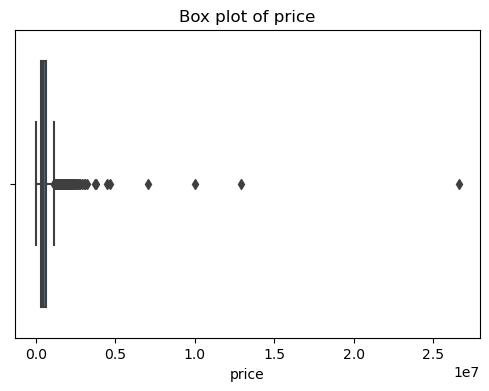

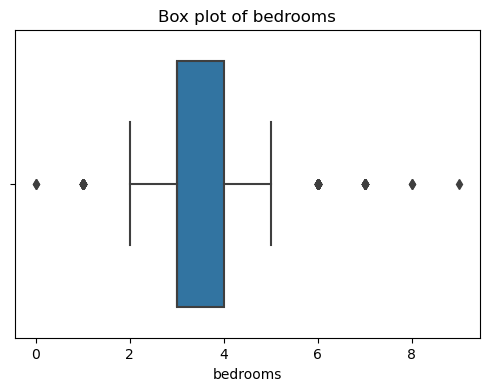

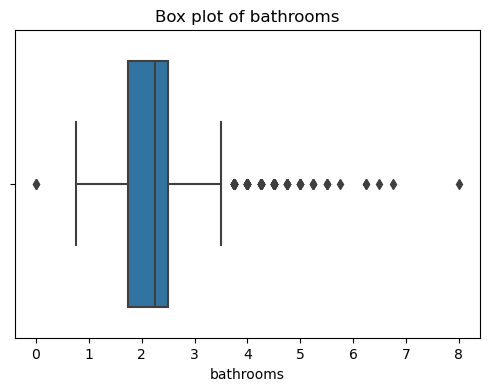

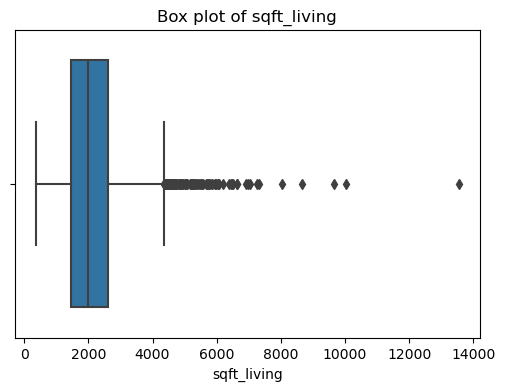

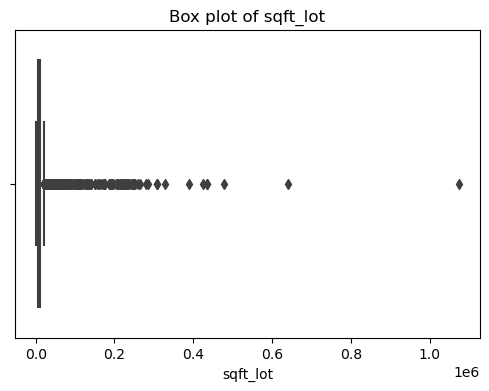

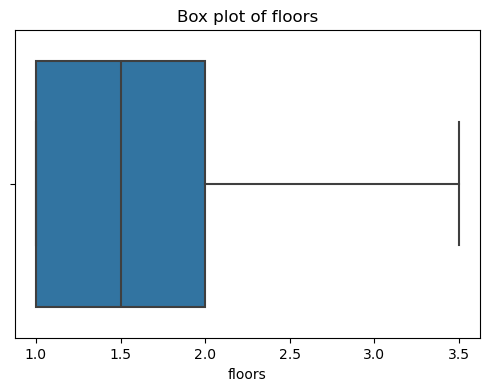

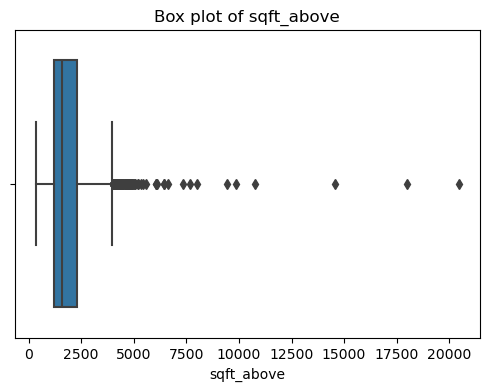

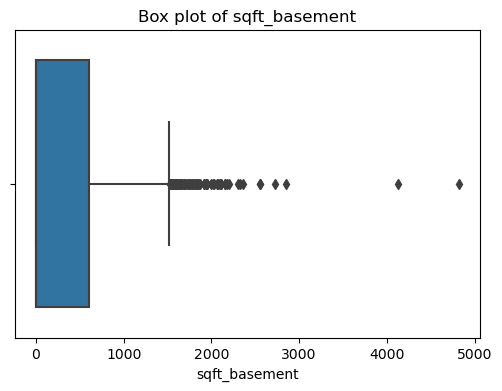

In [40]:
# Visualizing outliers using box plots for numerical columns
numerical_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Box plot of {col}')
    plt.show()


In [41]:
# Function to detect outliers using IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detecting outliers for each numerical column
outliers_dict = {}
bounds_dict = {}
for col in numerical_cols:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(data, col)
    outliers_dict[col] = outliers
    bounds_dict[col] = (lower_bound, upper_bound)

# Displaying the number of outliers detected in each column
for col, outliers in outliers_dict.items():
    print(f'Number of outliers in {col}: {len(outliers)}')


Number of outliers in price: 241
Number of outliers in bedrooms: 118
Number of outliers in bathrooms: 141
Number of outliers in sqft_living: 129
Number of outliers in sqft_lot: 538
Number of outliers in floors: 0
Number of outliers in sqft_above: 121
Number of outliers in sqft_basement: 82


In [42]:
# Function to replace outliers with mode
def replace_outliers_with_mode(df, column, lower_bound, upper_bound):
    mode_value = df[column].mode()[0]
    df[column] = df[column].apply(lambda x: mode_value if x < lower_bound or x > upper_bound else x)

# Replacing outliers in each numerical column with the mode
for col in numerical_cols:
    lower_bound, upper_bound = bounds_dict[col]
    replace_outliers_with_mode(data, col, lower_bound, upper_bound)
     
print("Data after replacing outliers with mode:")


Data after replacing outliers with mode:


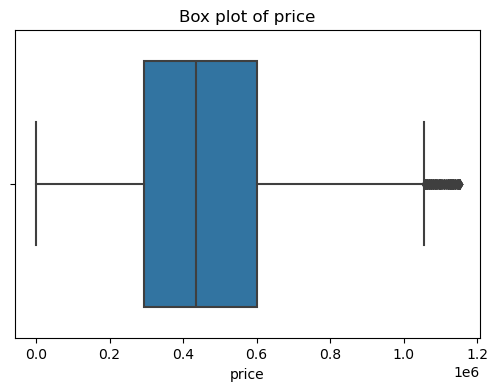

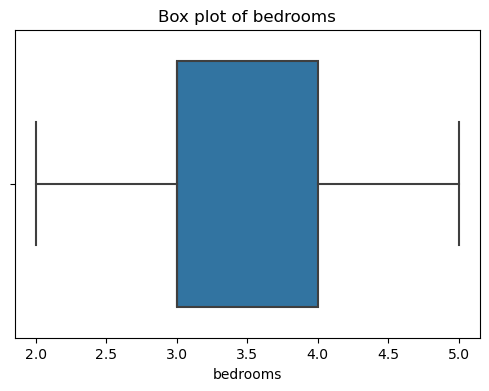

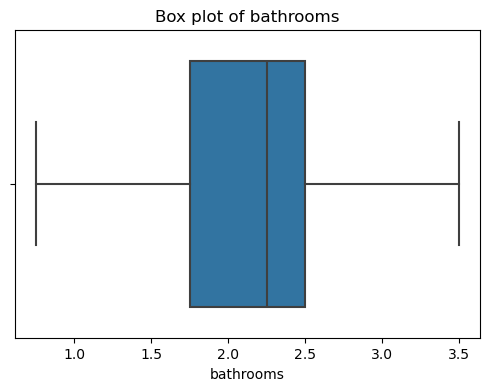

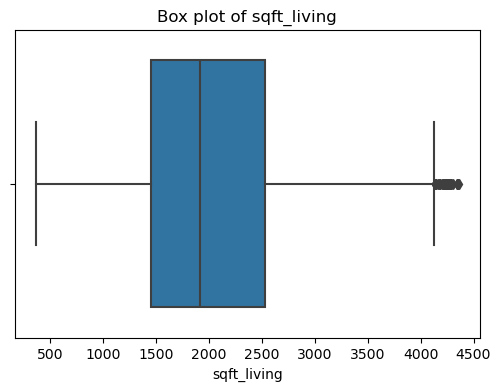

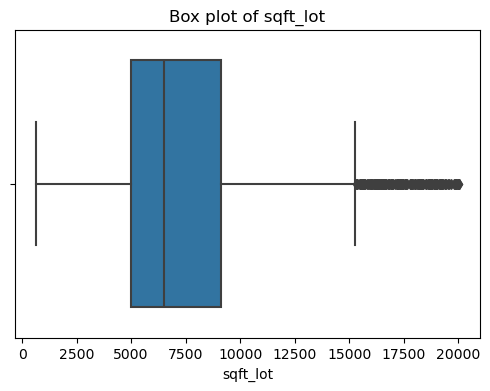

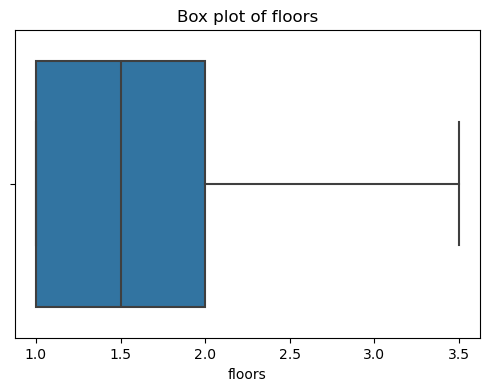

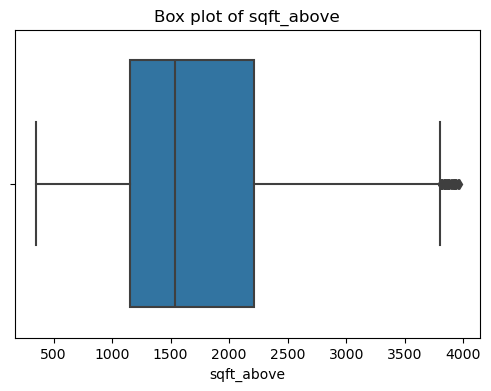

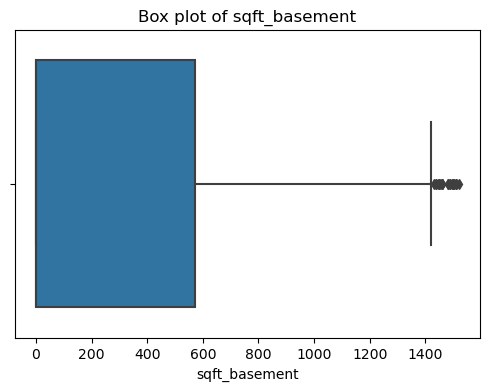

In [43]:
numerical_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Box plot of {col}')
    plt.show()

In [44]:
# Calculate the number of unique values for each column
unique_values_count = data.nunique()

# Calculate the percentage of unique values for each column
unique_percentage = (unique_values_count / len(data) * 100)

# Display the results
print("Number of unique values for each column:")
print(unique_values_count)
print("\nPercentage of unique values for each column:")
for column, percentage in unique_percentage.items():
    print(f"{column}: {percentage:.2f}%")

Number of unique values for each column:
date               70
price            1570
bedrooms            4
bathrooms          12
sqft_living       475
sqft_lot         2607
floors              6
waterfront          2
view                5
condition           5
sqft_above        437
sqft_basement     159
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

Percentage of unique values for each column:
date: 1.52%
price: 34.13%
bedrooms: 0.09%
bathrooms: 0.26%
sqft_living: 10.33%
sqft_lot: 56.67%
floors: 0.13%
waterfront: 0.04%
view: 0.11%
condition: 0.11%
sqft_above: 9.50%
sqft_basement: 3.46%
yr_built: 2.50%
yr_renovated: 1.30%
street: 98.37%
city: 0.96%
statezip: 1.67%
country: 0.02%


In [45]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Impute or remove missing values
# Example: Imputing with mean/mode or removing rows with missing values

# Impute numerical columns with mean
numerical_cols = data.select_dtypes(include=['number']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

# Impute categorical columns with mode
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# Verify missing values are handled
print("Missing values after imputation:")
print(data.isnull().sum())


Missing values in each column:
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living      40
sqft_lot         14
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
yr_built         23
yr_renovated      0
street            0
city             57
statezip          0
country           0
dtype: int64
Missing values after imputation:
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


In [46]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02/05/2014 0:00,313000.0,3,1.50,1340.0,7178.544919,1.5,0,0,3,1340,0,1955.0,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02/05/2014 0:00,0.0,5,2.50,3650.0,7178.544919,2.0,0,4,5,3370,280,1921.0,0,709 W Blaine St,Seattle,WA 98119,USA
2,02/05/2014 0:00,342000.0,3,2.00,1930.0,7178.544919,1.0,0,0,4,1930,0,1966.0,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02/05/2014 0:00,420000.0,3,2.25,2000.0,7178.544919,1.0,0,0,4,1000,1000,1963.0,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02/05/2014 0:00,550000.0,4,2.50,1940.0,7178.544919,1.0,0,0,4,1140,800,1976.0,1992,9105 170th Ave NE,Redmond,WA 98052,USA


<h1><b>2. Exploratory Data Analysis (EDA)</b><h1>


<h4>Univariate Analysis<br>
Explore distributions and summary statistics of individual variables.</h4>

In [47]:
pd.DataFrame(data.describe())

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,4.566433e+05,3.363261,2.105978,2039.314254,7178.544919,1.512065,0.007174,0.240652,3.451739,1734.550435,278.246739,1970.808827,808.608261
std,2.401389e+05,0.794358,0.674060,777.531836,3660.830492,0.538288,0.084404,0.778405,0.677230,731.583047,408.309897,29.650372,979.414536
min,0.000000e+00,2.000000,0.750000,370.000000,638.000000,1.000000,0.000000,0.000000,1.000000,350.000000,0.000000,1900.000000,0.000000
25%,2.950000e+05,3.000000,1.750000,1470.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,1150.000000,0.000000,1951.000000,0.000000
50%,4.350000e+05,3.000000,2.250000,1930.000000,6527.000000,1.500000,0.000000,0.000000,3.000000,1540.000000,0.000000,1975.000000,0.000000
75%,6.000000e+05,4.000000,2.500000,2522.500000,9100.000000,2.000000,0.000000,0.000000,4.000000,2210.000000,570.000000,1997.000000,1999.000000
max,1.150000e+06,5.000000,3.500000,4360.000000,20021.000000,3.500000,1.000000,4.000000,5.000000,3960.000000,1520.000000,2014.000000,2014.000000


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


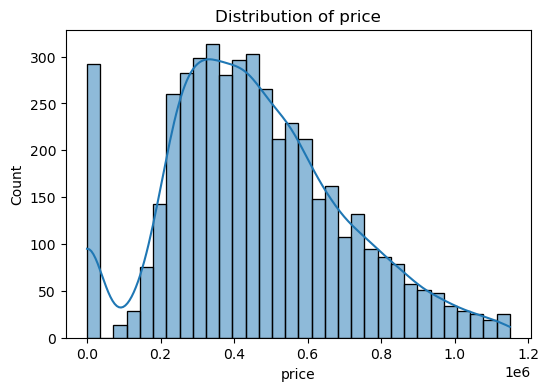

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


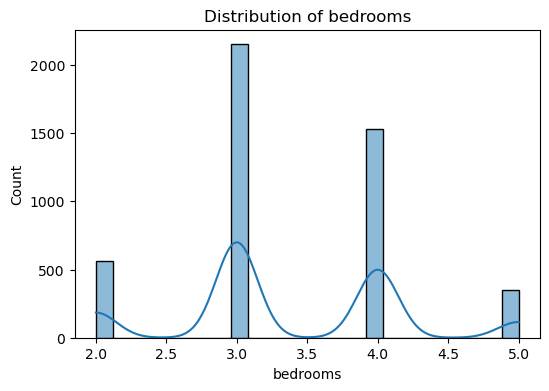

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


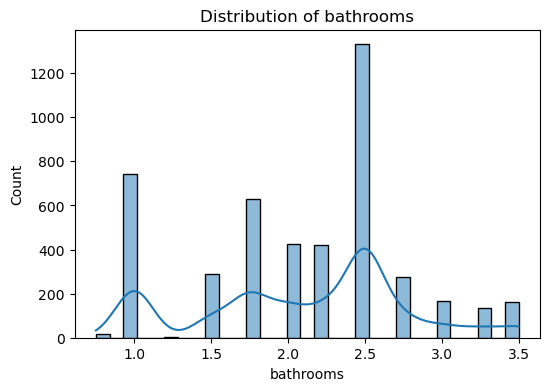

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


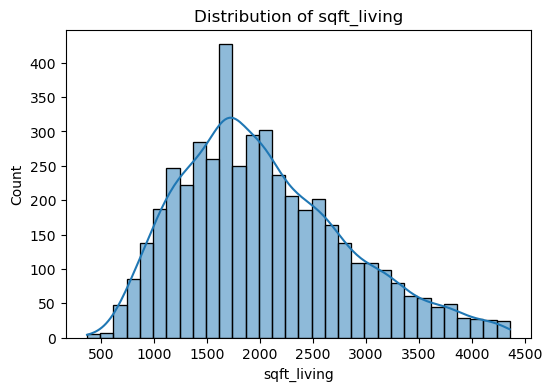

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


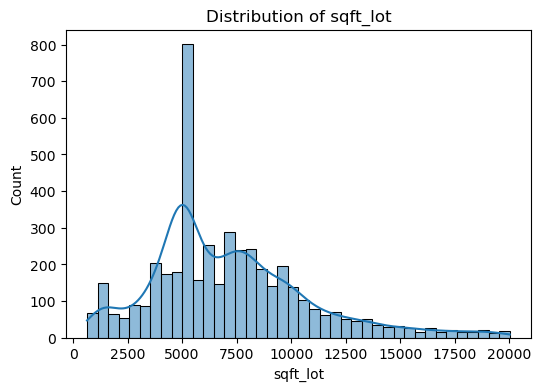

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


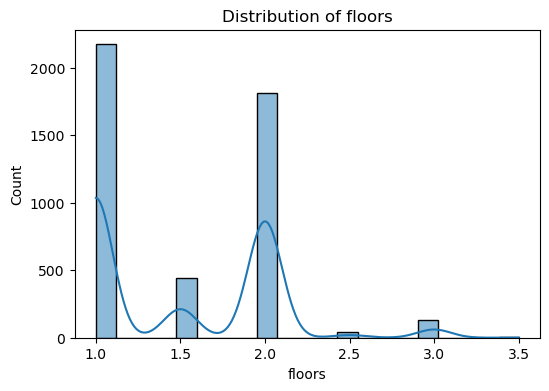

In [48]:
numerical_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

<h4>Bivariate Analysis
Investigate relationships between pairs of variables.</h4>

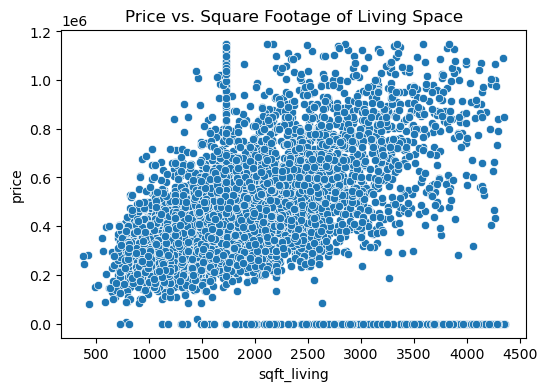

In [50]:
# Scatter plot: price vs sqft_living
plt.figure(figsize=(6, 4))
sns.scatterplot(x='sqft_living', y='price', data=data)
plt.title('Price vs. Square Footage of Living Space')
plt.show()


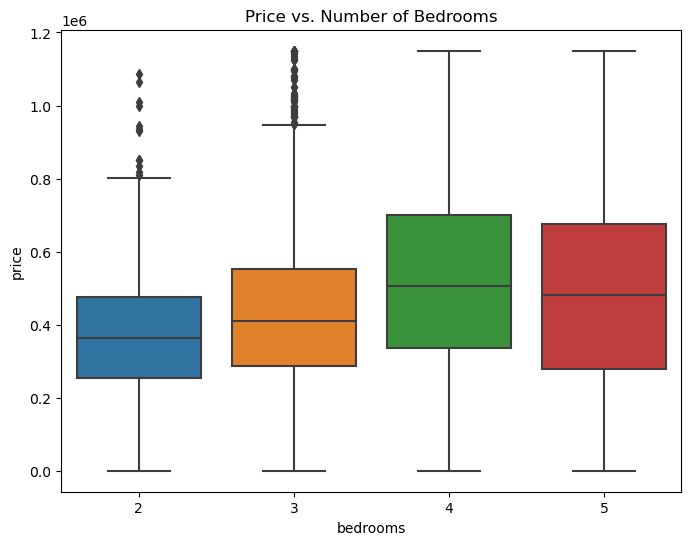

In [51]:
# Box plot: price vs bedrooms
plt.figure(figsize=(8, 6))
sns.boxplot(x='bedrooms', y='price', data=data)
plt.title('Price vs. Number of Bedrooms')
plt.show()

<h4>Multivariate Analysis
Examine interactions among multiple variables.<h4>

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

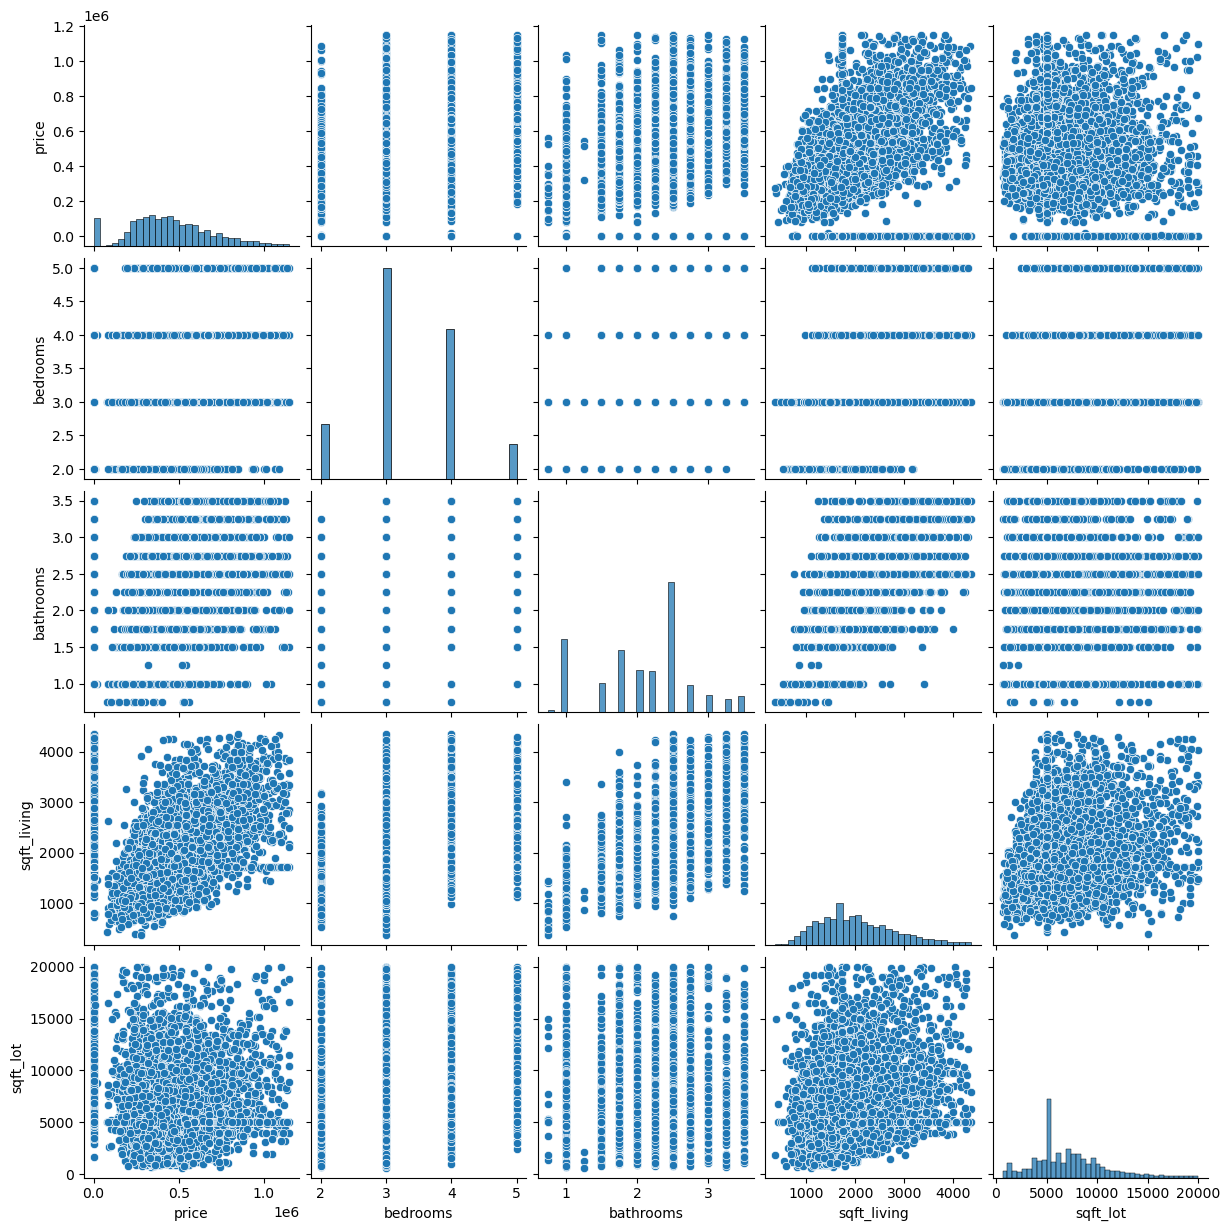

In [52]:
# Pairplot for a subset of variables
subset = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']
sns.pairplot(data[subset])
plt.show()



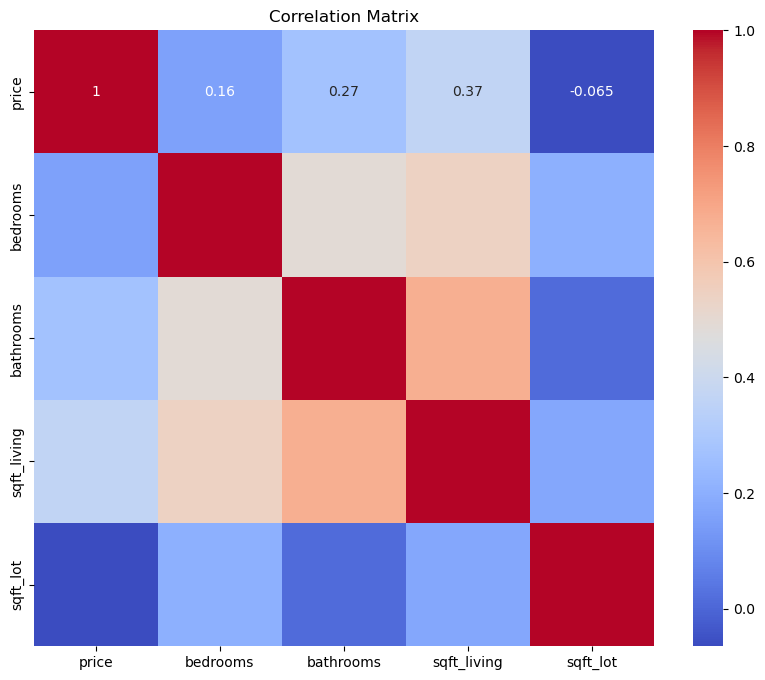

In [53]:

# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data[subset].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<h1><b>3. Visualization</b><h1>


<b>Create visualizations to illustrate trends, outliers, and geographical patterns.</b>

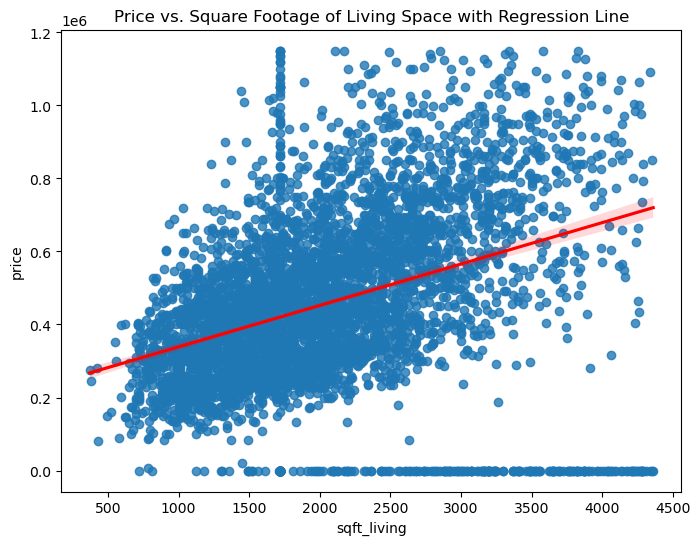

In [54]:
# Scatter plot with regression line: price vs sqft_living
plt.figure(figsize=(8, 6))
sns.regplot(x='sqft_living', y='price', data=data, line_kws={"color": "red"})
plt.title('Price vs. Square Footage of Living Space with Regression Line')
plt.show()




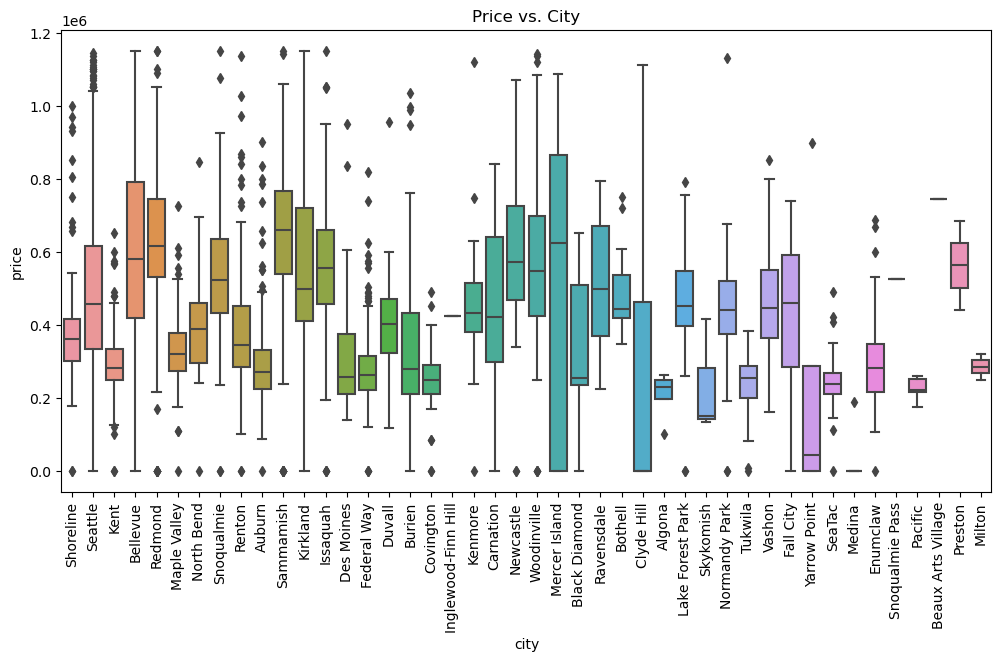

In [55]:
# Box plot: price vs city
plt.figure(figsize=(12, 6))
sns.boxplot(x='city', y='price', data=data)
plt.xticks(rotation=90)
plt.title('Price vs. City')
plt.show()

<h1>4. Feature Engineering</h1>

<h4>Create new features and perform dimensionality reduction if necessary.</h4>

In [20]:
# Example: Create new features such as age of the property and price per square foot
data['age'] = 2024 - data['yr_built']
data['price_per_sqft'] = data['price'] / data['sqft_living']

# Check the new features
print(data[['age', 'price_per_sqft']].head())


     age  price_per_sqft
0   69.0      233.582090
1  103.0        0.000000
2   58.0      177.202073
3   61.0      210.000000
4   48.0      283.505155


<h1>5. Analysis and Interpretation</h1>

In [21]:
# Exclude non-numeric columns from correlation analysis
numeric_data = data.select_dtypes(include=['number'])

# Analysis to find key drivers of housing prices
correlation_with_price = numeric_data.corr()['price'].sort_values(ascending=False)
print("Correlation of various features with price:")
print(correlation_with_price)

# Insights and recommendations
# Example insights: Larger square footage and newer properties tend to have higher prices.


Correlation of various features with price:
price             1.000000
price_per_sqft    0.647074
sqft_living       0.367266
sqft_above        0.298656
bathrooms         0.269959
floors            0.173079
bedrooms          0.156894
sqft_basement     0.102039
yr_built          0.058664
condition         0.016563
view             -0.006247
waterfront       -0.034090
yr_renovated     -0.055879
age              -0.058664
sqft_lot         -0.064641
Name: price, dtype: float64


In [22]:
from scipy.stats import f_oneway

# Perform F-test (ANOVA) for each numerical feature
f_test_results = {}
for col in numeric_data.columns:
    if col != 'price':  # Exclude 'price' column from F-test
        groups = []
        for group_name, group_data in data.groupby('city'):
            groups.append(group_data[col].dropna())
        f_statistic, p_value = f_oneway(*groups)
        f_test_results[col] = {'F-statistic': f_statistic, 'p-value': p_value}

# Display F-test results
print("F-test (ANOVA) results:")
for feature, results in f_test_results.items():
    print(f"Feature: {feature}, F-statistic: {results['F-statistic']}, p-value: {results['p-value']}")


F-test (ANOVA) results:
Feature: bedrooms, F-statistic: 9.455500845537772, p-value: 1.0696751549877551e-57
Feature: bathrooms, F-statistic: 13.007651858138793, p-value: 3.935290450429201e-85
Feature: sqft_living, F-statistic: 16.382549875716286, p-value: 5.2071824202281575e-111
Feature: sqft_lot, F-statistic: 34.33165262529381, p-value: 4.239061580649388e-241
Feature: floors, F-statistic: 8.18556451380686, p-value: 6.278909092884813e-48
Feature: waterfront, F-statistic: 7.288042492428324, p-value: 4.481143711556864e-41
Feature: view, F-statistic: 6.1748437925839506, p-value: 1.1190065756931509e-32
Feature: condition, F-statistic: 6.370566120063226, p-value: 3.8314666671955904e-34
Feature: sqft_above, F-statistic: 21.117148932653194, p-value: 1.1661946541463544e-146
Feature: sqft_basement, F-statistic: 7.963666352145423, p-value: 3.1428425053829938e-46
Feature: yr_built, F-statistic: 38.543490339740146, p-value: 1.3400800101143593e-269
Feature: yr_renovated, F-statistic: 6.0136018337354

In [23]:
# Columns identified as important based on F-test results
f_test_columns = [
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
    'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
    'yr_built', 'yr_renovated', 'age', 'price_per_sqft'
]

# Columns identified as important based on correlation analysis
correlation_columns = [
    'price_per_sqft', 'sqft_living', 'sqft_above', 'bathrooms', 'floors'
]

# Finalizing the columns by taking the intersection of important columns from both analyses
final_columns = list(set(f_test_columns) & set(correlation_columns))

print("Finalized important columns:")
print(final_columns)


Finalized important columns:
['sqft_above', 'floors', 'bathrooms', 'price_per_sqft', 'sqft_living']
